# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

So far we have studied about various mophological operations and different thresholding techniques in some detail. Now it's time to apply these concepts for a practical application - **Coin Detection**.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this assignment, you will work with 2 different images (so 2 different parts) and will use **only** morphological operations and thresholding techniques to detect the total number of coins present in the image. Your submission will be graded based on your use of the concepts covered in this module, experimentation performed to achieve at your final solution, documentation, and finally, the total number of coins successfully detected in the images. Each part will be of 15 marks. This assignment will be entirely **manually graded** so make sure that you do NOT remove any experimentation you have done as well as the observation you made after each step.

**Proper documentation for each step should be provided with help of markdown**

## <font style = "color:rgb(50,120,229)">Outline</font>

The main steps that you can follow to solve this assignment are:

1. Read the image.
2. Convert it to grayscale and split the image into the 3 (Red, Green and Blue) channels. Decide which of the above 4 images you want to use in further steps and provide reason for the same.
3. Use thresholding and/or morphological operations to arrive at a final binary image.
4. Use **simple blob detector** to count the number of coins present in the image.
5. Use **contour detection** to count the number of coins present in the image.
6. Use **CCA** to count the number of coins present in the image.

**We have also provided the results we obtained at the intermediate steps for your reference.**

# <font style = "color:rgb(50,120,229)">Assignment Part - A</font>

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Original Image')

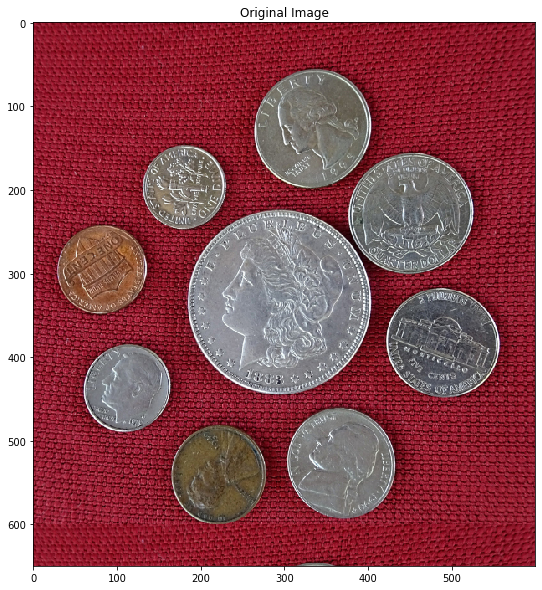

In [3]:
# Image path
imagePath = "images/CoinsA.png"
# Read image and store it in the variable image
image = cv2.imread(imagePath)
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [4]:
# Convert image to grayscale
# Store it in the variable imageGray
imageGray = cv2.imread(imagePath, 0)

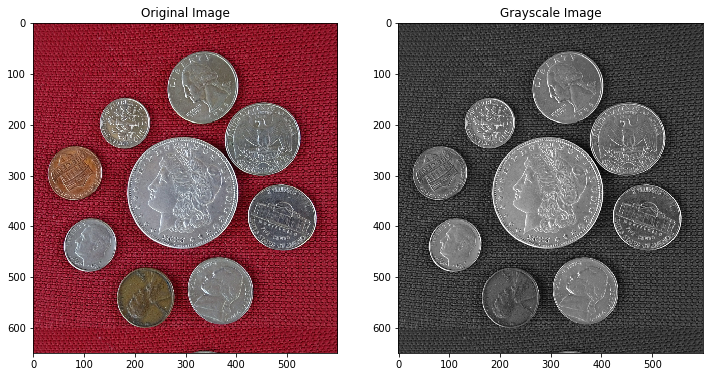

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [6]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
imageB, imageG, imageR = cv2.split(image)

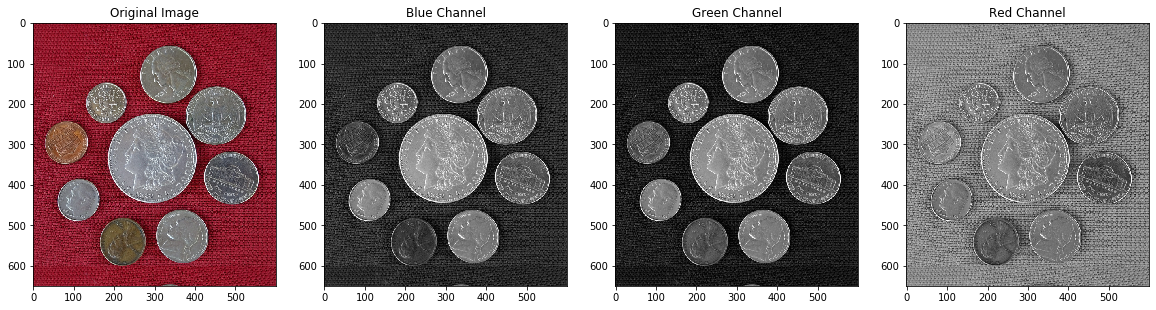

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

Text(0.5, 1.0, 'Best Thresh Image')

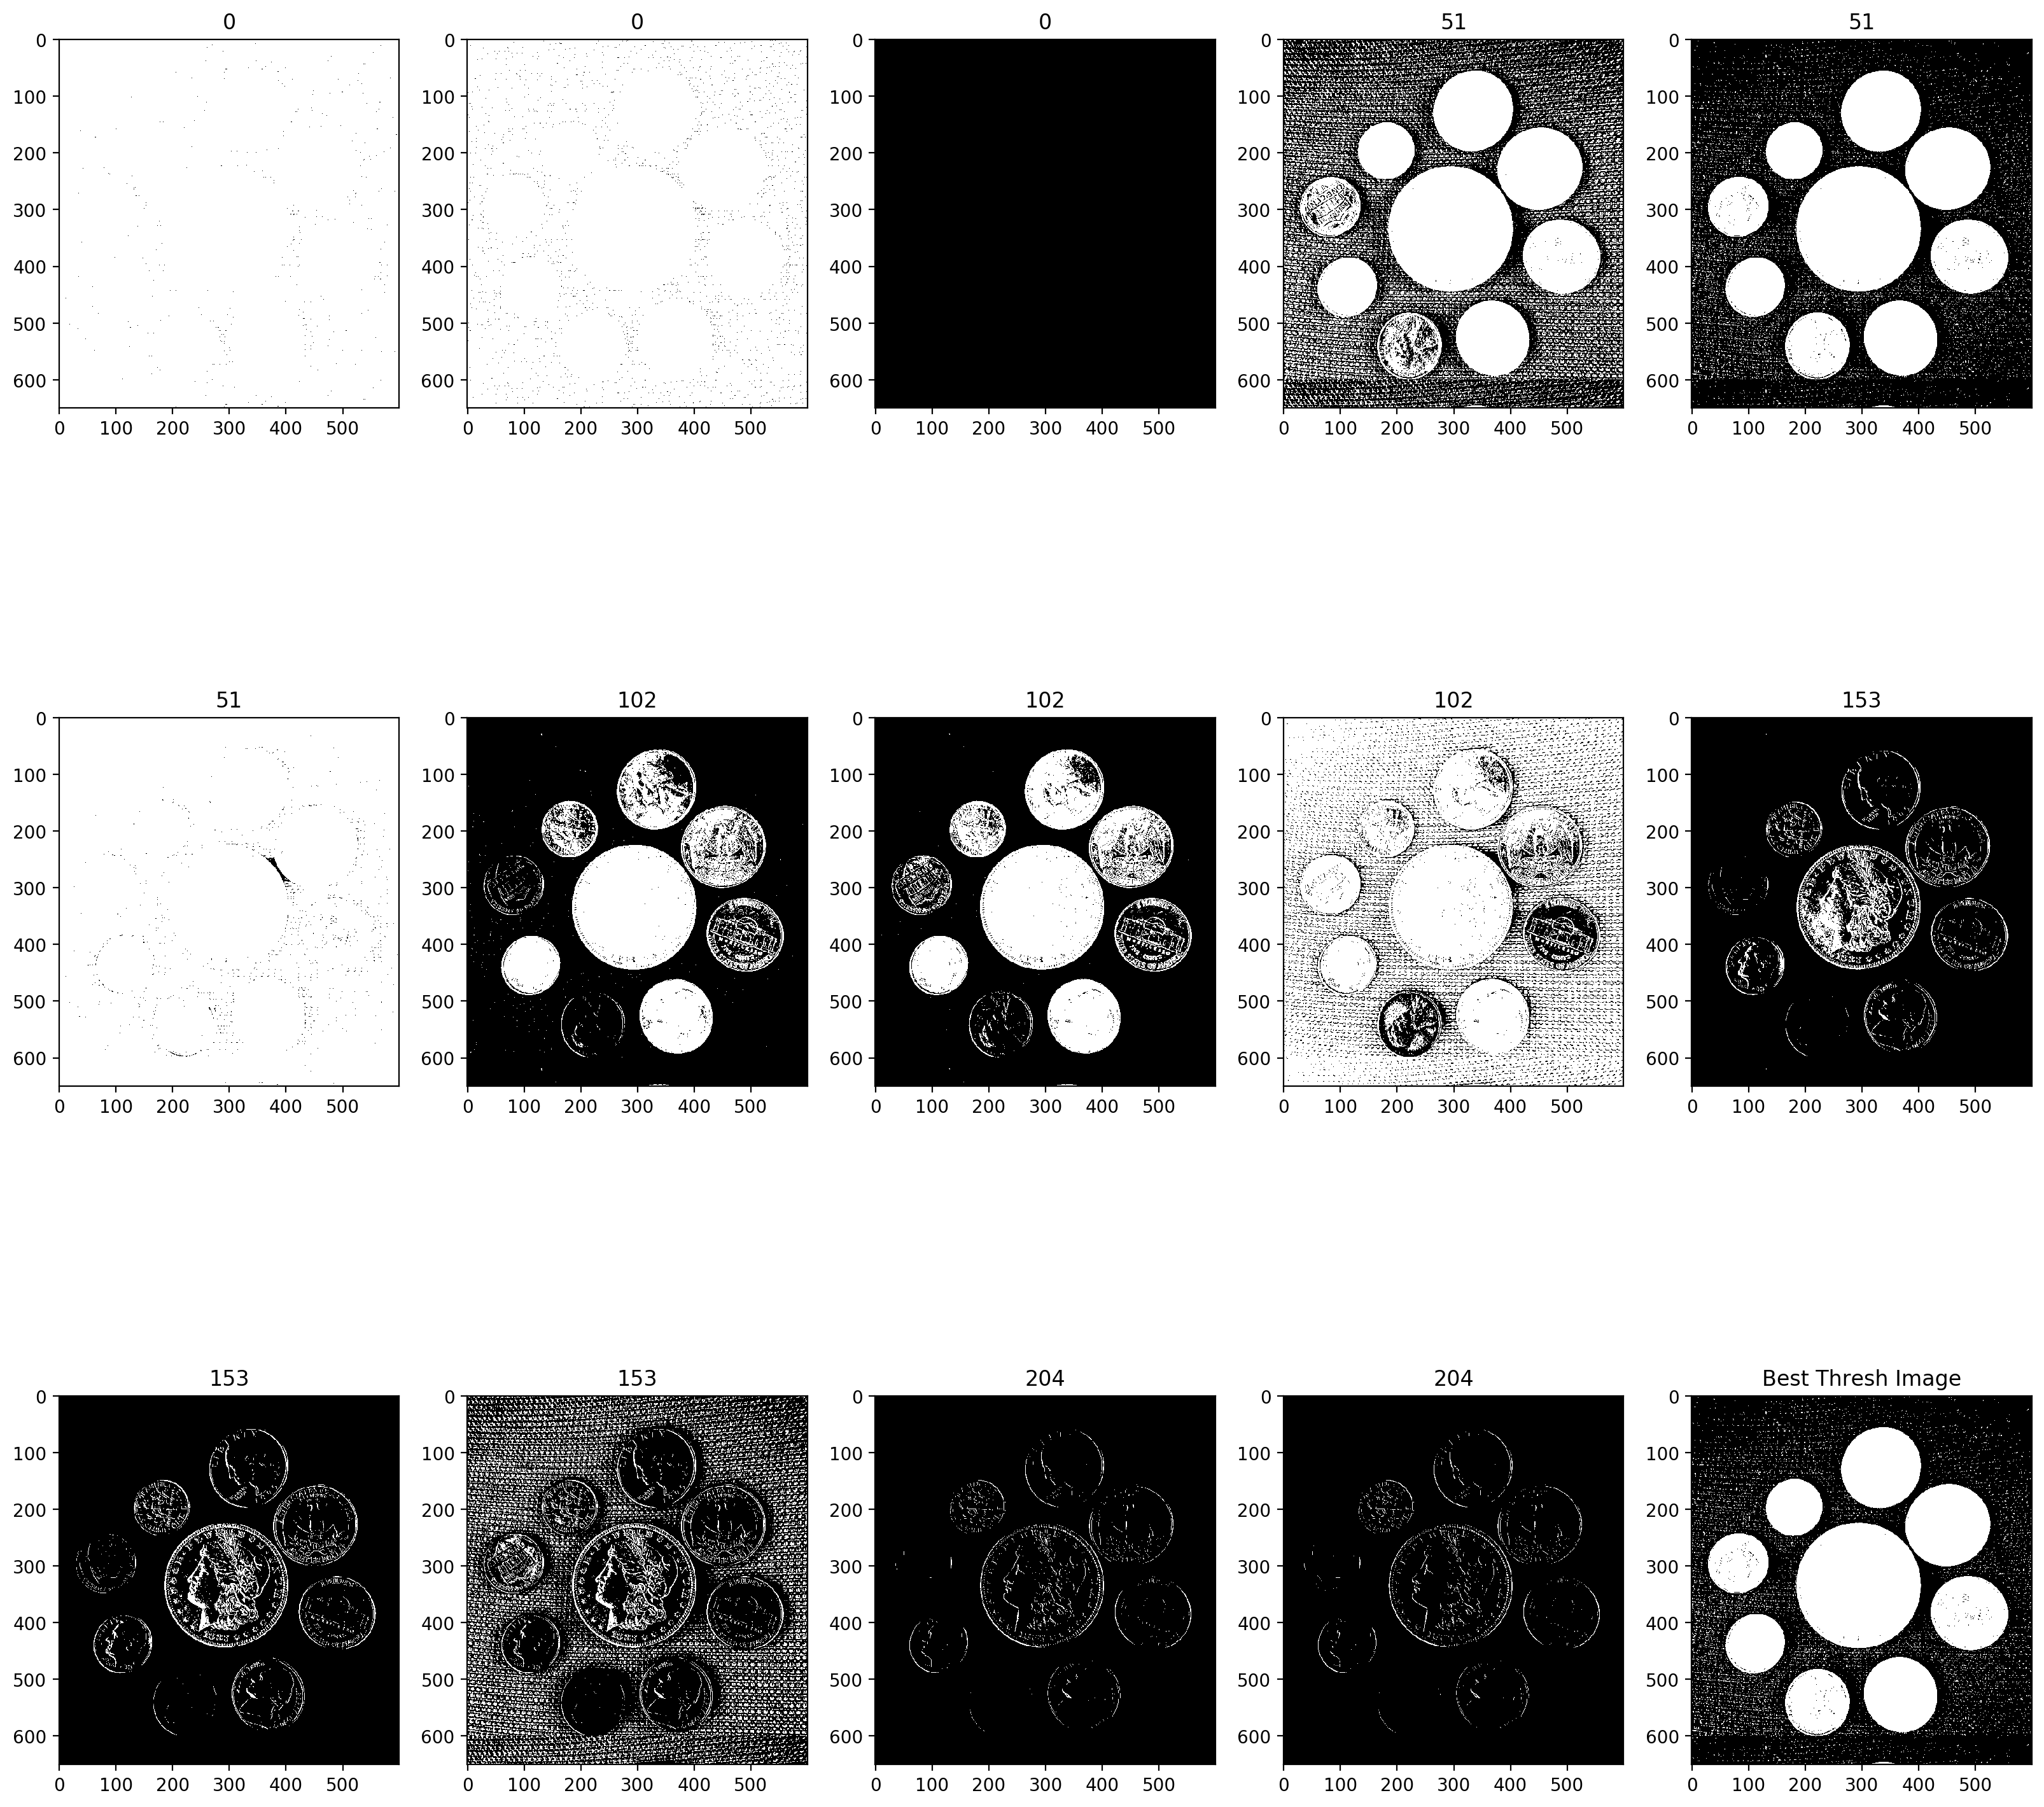

In [8]:
# create fig
fig = plt.figure(figsize=(20,20), dpi=200)
# set attribute default values
step = 51
maxValue = 255
nrows = 3
ncols = maxValue // step

# loop through image channels and threshold values to find the best quality image to continue with
i = 1
threshOutputImages = []
for thresh in range(0, maxValue, step):
    for img in imageB, imageG, imageR:
        th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)
        threshOutputImages.append(dst)
        fig.add_subplot(nrows, ncols, i).set_title(str(thresh))
        plt.imshow(dst)
        i = i + 1
        
# define best thresh image and add it to plot
bestThreshImage = threshOutputImages[4]
plt.imshow(bestThreshImage)
plt.title("Best Thresh Image")

Text(0.5, 1.0, 'Best Thresh Image')

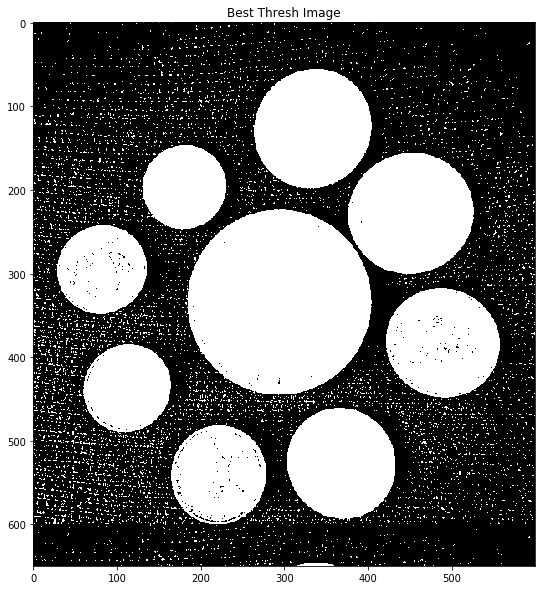

In [9]:
# Display the thresholded image
plt.imshow(bestThreshImage)
plt.title("Best Thresh Image")

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

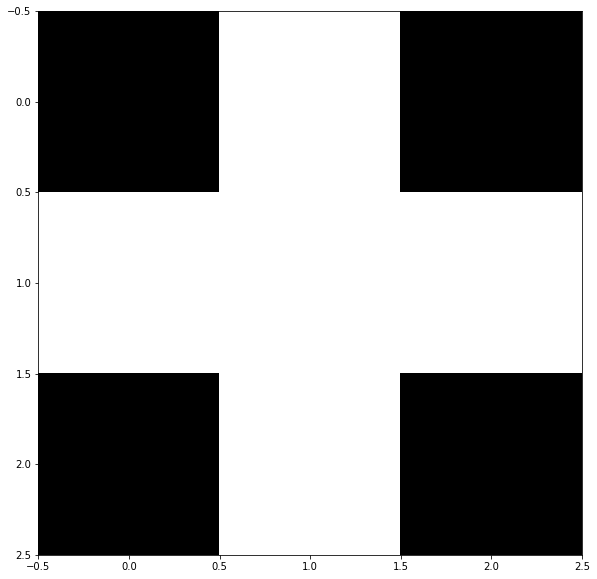

In [10]:
# Get structuring element/kernel which will be used for dilation
smallkSize = (3,3)
medkSize = (5,5)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, smallkSize)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, medkSize)
plt.imshow(kernel1)

In [11]:
# list to store images
morphImageList = []
# Apply dilate function on the input image then append to list
dilatedImage = cv2.dilate(bestThreshImage, kernel1, iterations=2)
morphImageList.append(dilatedImage)
# Apply erode function with larger kernel on the dilated image
erodedImage = cv2.erode(dilatedImage, kernel2, iterations=3)
morphImageList.append(erodedImage)
# final image after morphological operations
morphImage = erodedImage.copy()
morphImageList.append(morphImage)
# inverse of morphImage
inverseMorphImage = cv2.bitwise_not(morphImage)
morphImageList.append(inverseMorphImage)

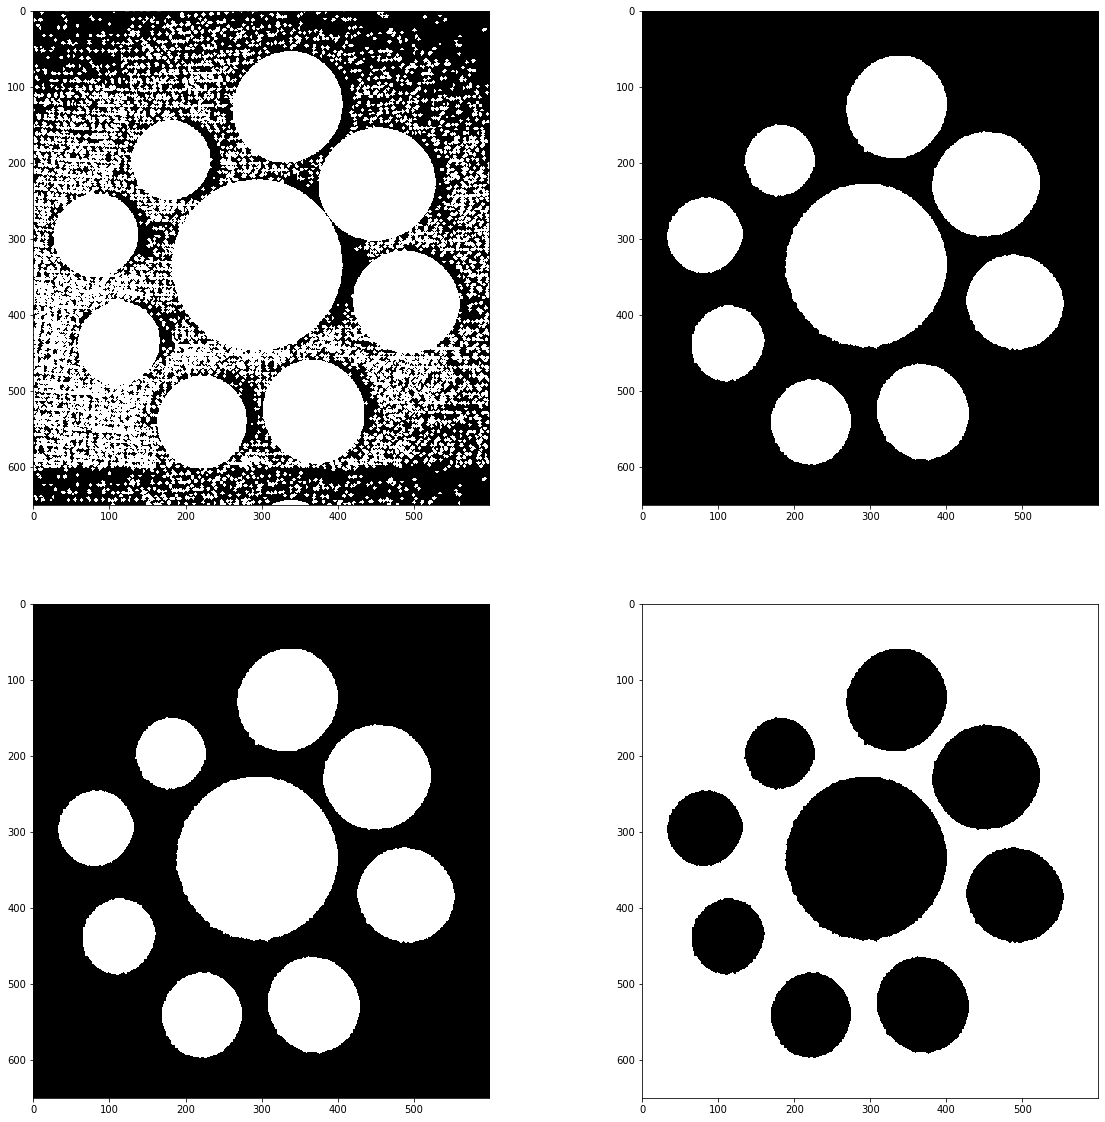

In [12]:
# Display all the images
# you have obtained in the intermediate steps
fig = plt.figure(figsize=(20,20))
row = len(morphImageList) // 2
col = len(morphImageList) // 2
imgPlot = 1

# loop to display images from morphImageList
for img in morphImageList:
    fig.add_subplot(row, col, imgPlot)
    plt.imshow(img)
    imgPlot = imgPlot + 1

In [13]:
colorMorphImage = cv2.cvtColor(morphImageList[2], cv2.COLOR_GRAY2BGR)
colorInverseMorphImage = cv2.cvtColor(morphImageList[3], cv2.COLOR_GRAY2BGR)
colorMorphImageCopy = colorMorphImage.copy()
colorInverseMorphImageCopy = colorInverseMorphImage.copy()

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [14]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [15]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

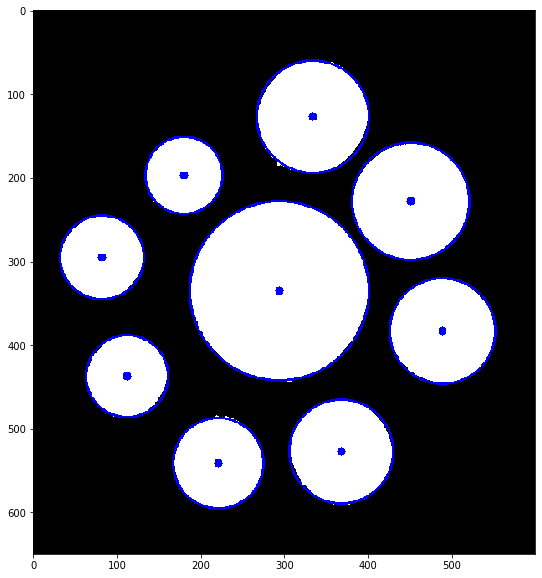

In [16]:
# Detect blobs
keypoints = detector.detect(colorInverseMorphImageCopy)
 
# Mark blobs using image annotation concepts we have studied so far
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in blue
    cv2.circle(colorMorphImageCopy,(x,y),5,(0,0,255),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in blue
    cv2.circle(colorMorphImageCopy,(x,y),radius,(0,0,255),2)
plt.imshow(colorMorphImageCopy)

In [17]:
# Print number of coins detected
print(len(keypoints))

9


**Note that we were able to detect all 9 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [18]:
# Mark coins using image annotation concepts we have studied so far
imageCopy = image.copy()
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLUE
    cv2.circle(imageCopy,(x,y),5,(255,0,0),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in BLUE
    cv2.circle(imageCopy,(x,y),radius,(255,0,0),2)

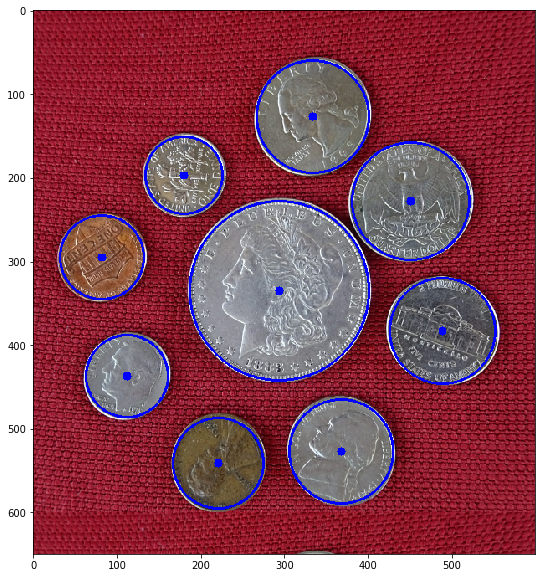

In [19]:
# Display the final image
plt.imshow(imageCopy[:,:,::-1])

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [20]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:,:,::-1])

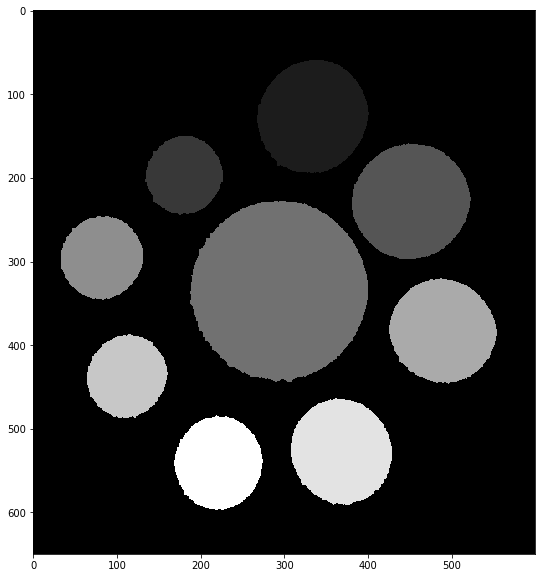

In [21]:
# Find connected components
_, imLabels = cv2.connectedComponents(erodedImage)
plt.imshow(imLabels)

In [22]:
# Print number of connected components detected
print(_)

10


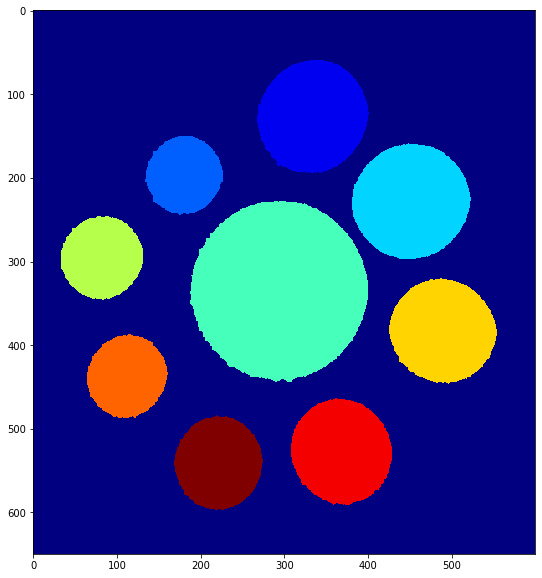

In [23]:
# Display connected components using displayConnectedComponents
# function
displayConnectedComponents(imLabels)

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [24]:
# Find all contours in the image
allContours, hierarchy = cv2.findContours(inverseMorphImage, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
# Print the number of contours found
print("Number of contours found = {}".format(len(allContours)))

Number of contours found = 10


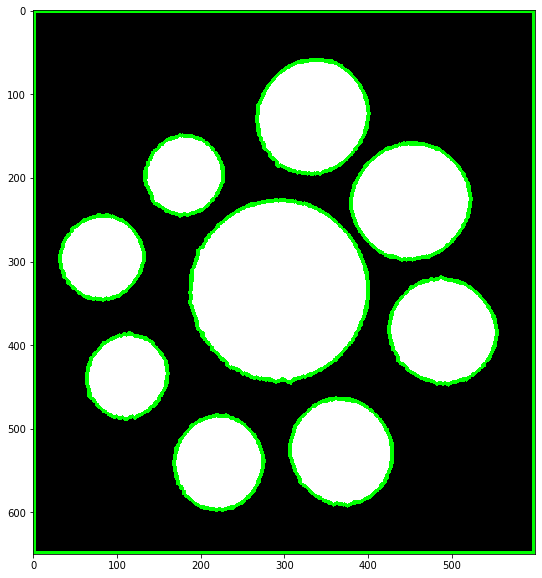

In [26]:
# Draw all contours
colorErodedImage = cv2.cvtColor(morphImageList[2], cv2.COLOR_GRAY2BGR)
contouredImage = cv2.drawContours(colorErodedImage, allContours, -1, (0,255,0), 3)
plt.imshow(contouredImage[:,:,::-1])

Let's only consider the outer contours.

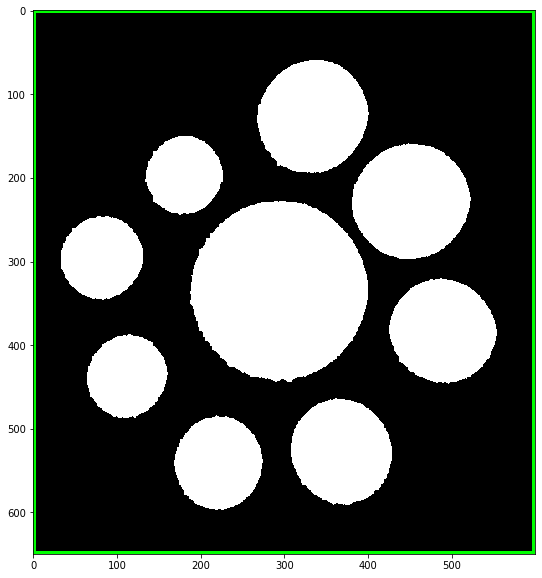

In [27]:
# Remove the inner contours
colorErodedImageCopy = cv2.cvtColor(morphImageList[2], cv2.COLOR_GRAY2BGR)
contours, hierarchy = cv2.findContours(inverseMorphImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Display the result
externalContouredImage = cv2.drawContours(colorErodedImageCopy, contours, -1, (0,255,0), 3)
plt.imshow(externalContouredImage[:,:,::-1])

So, we only need the inner contours. The easiest way to do that will be to remove the outer contour using area.

In [28]:
# Print area and perimeter of all contours
for index,cnt in enumerate(allContours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

Contour #1 has area = 9267.0 and perimeter = 369.84775936603546
Contour #2 has area = 12022.5 and perimeter = 421.5462428331375
Contour #3 has area = 7463.0 and perimeter = 338.53405153751373
Contour #4 has area = 12436.5 and perimeter = 429.6883798837662
Contour #5 has area = 7708.5 and perimeter = 339.2619740962982
Contour #6 has area = 35722.0 and perimeter = 738.180801987648
Contour #7 has area = 15275.0 and perimeter = 469.3868635892868
Contour #8 has area = 6764.0 and perimeter = 319.705624461174
Contour #9 has area = 14087.0 and perimeter = 455.93101954460144
Contour #10 has area = 388751.0 and perimeter = 2496.0


In [29]:
# Print maximum area of contour
# This will be the box that we want to remove
maxContour = cv2.contourArea(allContours[9])
print("Contour #{} has area = {}".format(index+1,area))

Contour #10 has area = 388751.0


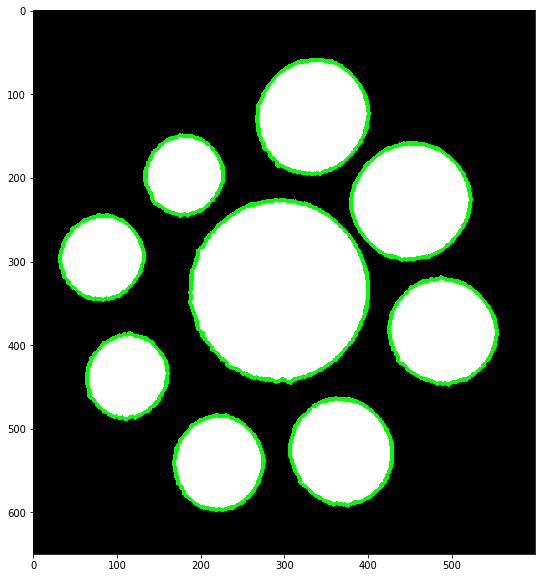

In [30]:
# Remove this contour and plot others
del allContours[-1]
# Remove the inner contours
colorErodedImageCopy2 = cv2.cvtColor(morphImageList[2], cv2.COLOR_GRAY2BGR)
# Display the result
externalContouredImage2 = cv2.drawContours(colorErodedImageCopy2, allContours, -1, (0,255,0), 3)
plt.imshow(externalContouredImage2[:,:,::-1])

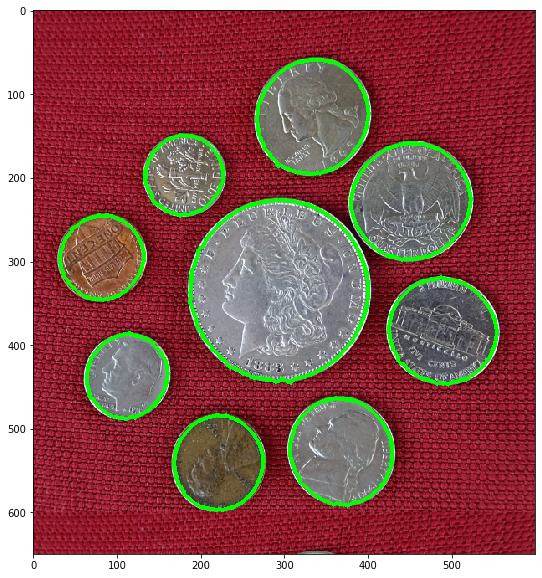

In [31]:
# Fit circles on coins
contouredImage = cv2.drawContours(image, allContours, -1, (0,255,0), 3)
plt.imshow(contouredImage[:,:,::-1])

# <font style = "color:rgb(50,120,229)">Assignment Part - B</font>

**Follow the same steps as provided in Assignment Part - A**

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

Text(0.5, 1.0, 'Original Image')

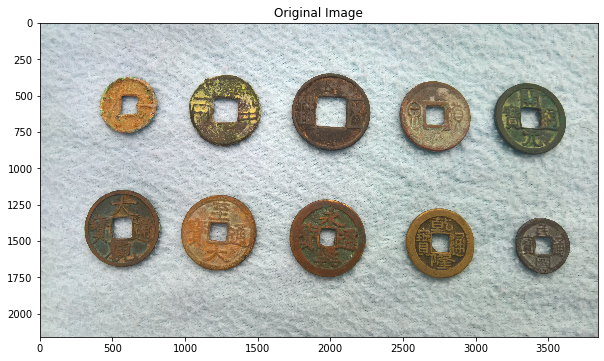

In [32]:
# Image path
imagePath = "images/CoinsB.png"
# Read image
# Store it in variable image
image = cv2.imread(imagePath)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [33]:
# Convert to grayscale
# Store in variable imageGray
imageGray = cv2.imread(imagePath, 0)

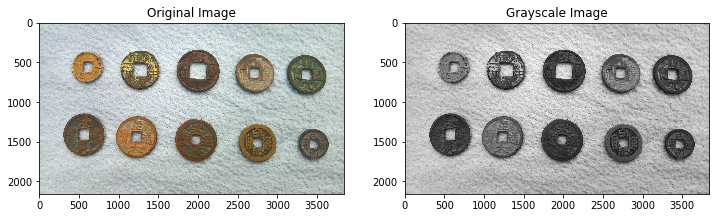

In [34]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [35]:
# Split cell into channels
# Variables are: imageB, imageG, imageR
imageB, imageG, imageR = cv2.split(image)

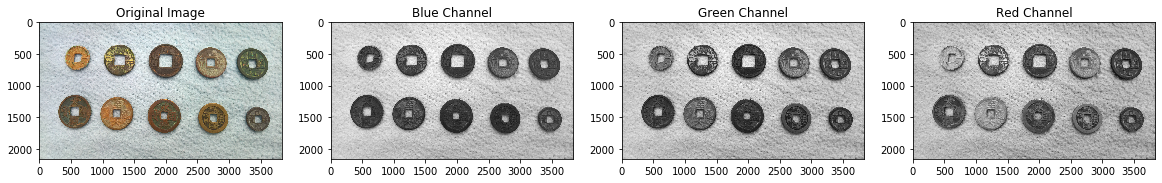

In [36]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

Text(0.5, 1.0, 'Best Thresh Image')

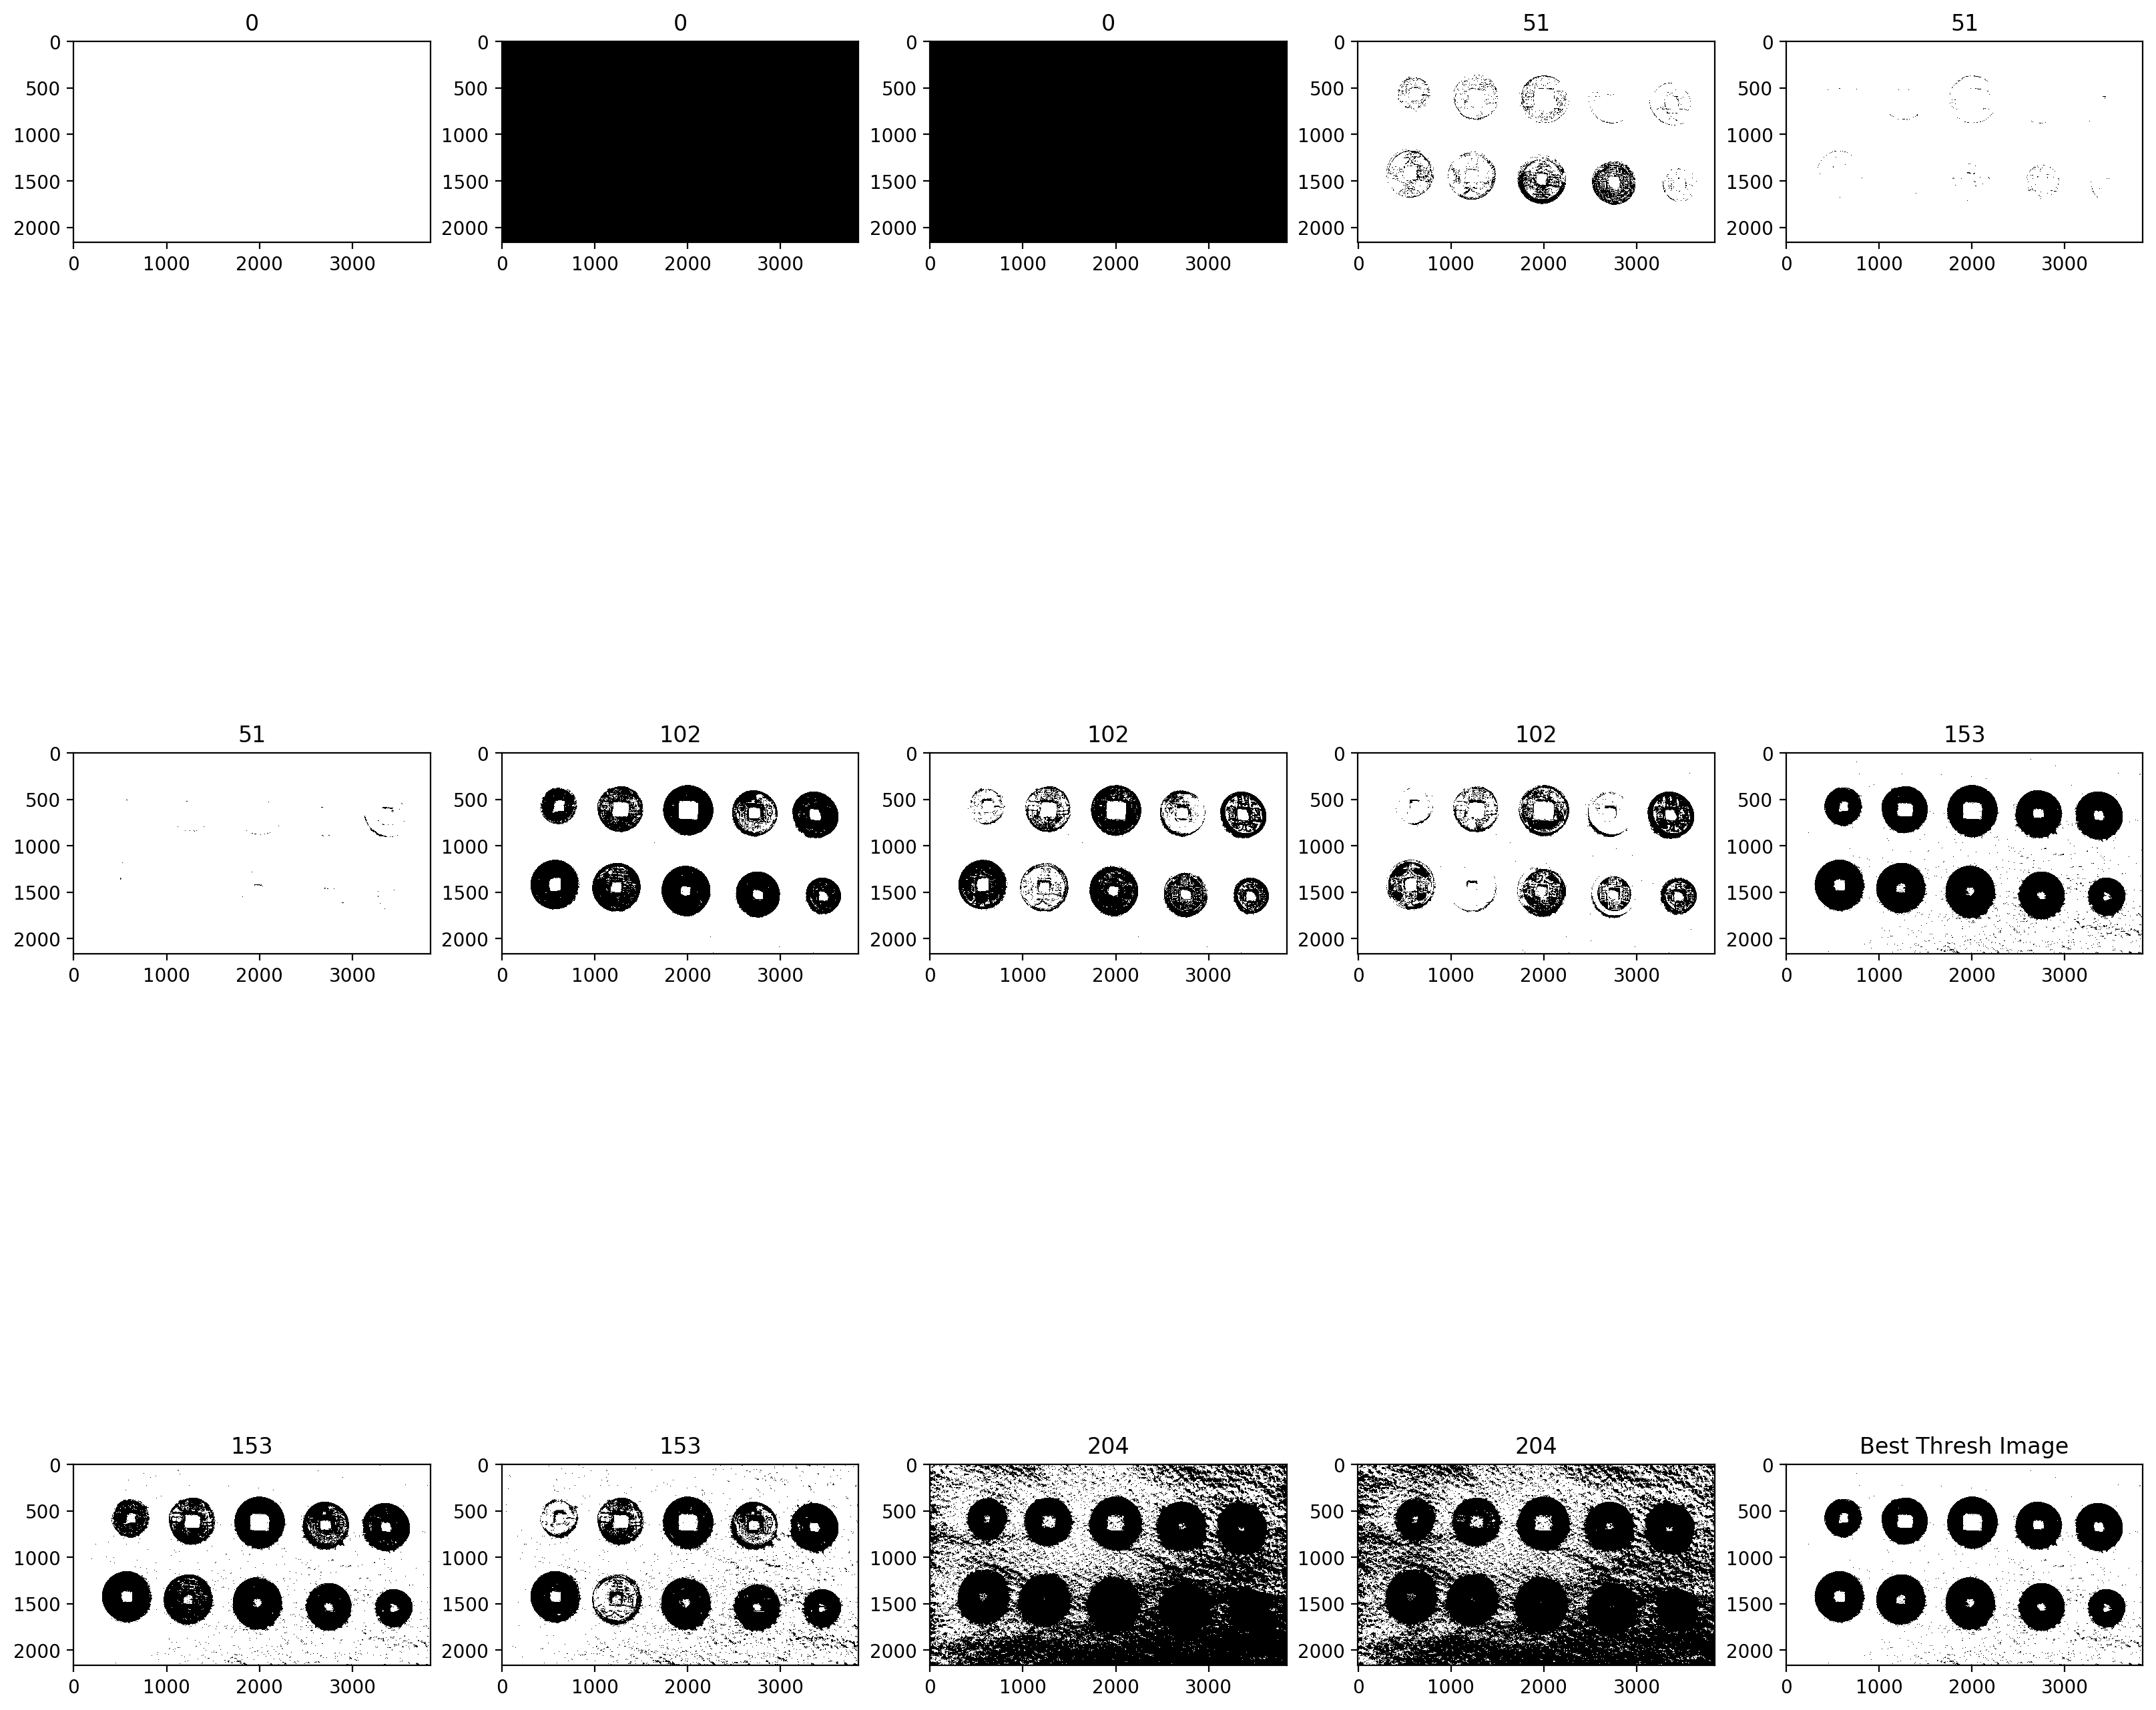

In [37]:
# create fig
fig = plt.figure(figsize=(20,20), dpi=200)
# set attribute default values
step = 51
maxValue = 255
nrows = 3
ncols = maxValue // step

# loop through image channels and threshold values to find the best quality image to continue with
i = 1
threshOutputImages = []
for thresh in range(0, maxValue, step):
    for img in imageB, imageG, imageR:
        th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)
        threshOutputImages.append(dst)
        fig.add_subplot(nrows, ncols, i).set_title(str(thresh))
        plt.imshow(dst)
        i = i + 1
        
# define best thresh image and add it to plot
bestThreshImage = threshOutputImages[9]
plt.imshow(bestThreshImage)
plt.title("Best Thresh Image")

Text(0.5, 1.0, 'Best Thresh Image')

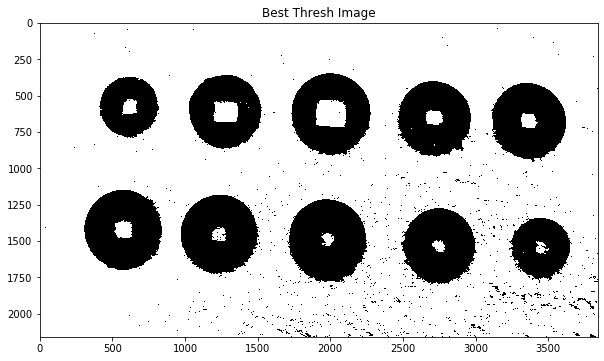

In [38]:
# Display image using matplotlib
plt.imshow(bestThreshImage)
plt.title("Best Thresh Image")

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

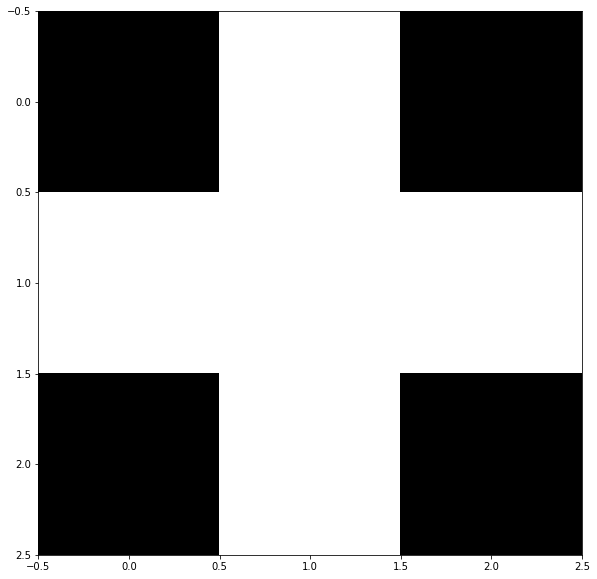

In [39]:
# Get structuring element/kernel which will be used for dilation
smallkSize = (3,3)
medkSize = (9,9)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, smallkSize)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, medkSize)
plt.imshow(kernel1)

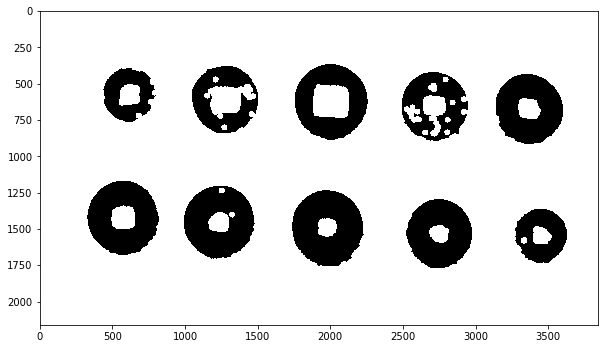

In [40]:
# list to store images
morphImageList = []
# Apply dilate function on the input image
dilatedImage = cv2.dilate(bestThreshImage, kernel2, iterations=5)
morphImageList.append(dilatedImage)
plt.imshow(dilatedImage)

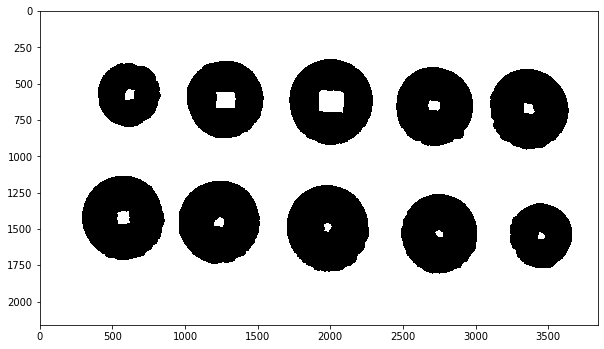

In [41]:
# Apply erode function with larger kernel on the dilated image
erodedImage = cv2.erode(dilatedImage, kernel2, iterations=9)
morphImageList.append(erodedImage)
# final image after morphological operations
morphImage = erodedImage.copy()
morphImageList.append(morphImage)
# inverse of morphImage
inverseMorphImage = cv2.bitwise_not(morphImage)
morphImageList.append(inverseMorphImage)
plt.imshow(morphImage)

In [42]:
# convert images back to BGR
colorMorphImage = cv2.cvtColor(morphImageList[2], cv2.COLOR_GRAY2BGR)
colorInverseMorphImage = cv2.cvtColor(morphImageList[3], cv2.COLOR_GRAY2BGR)
# copy images
colorMorphImageCopy = colorMorphImage.copy()
colorInverseMorphImageCopy = colorInverseMorphImage.copy()

In [43]:
###
### YOUR CODE HERE
###


In [44]:
###
### YOUR CODE HERE
###


In [45]:
###
### YOUR CODE HERE
###


In [46]:
###
### YOUR CODE HERE
###


In [47]:
###
### YOUR CODE HERE
###


In [48]:
###
### YOUR CODE HERE
###


In [49]:
###
### YOUR CODE HERE
###


In [50]:
###
### YOUR CODE HERE
###


In [51]:
###
### YOUR CODE HERE
###


In [52]:
###
### YOUR CODE HERE
###


In [53]:
###
### YOUR CODE HERE
###


In [54]:
###
### YOUR CODE HERE
###


In [55]:
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [56]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [57]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)


## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

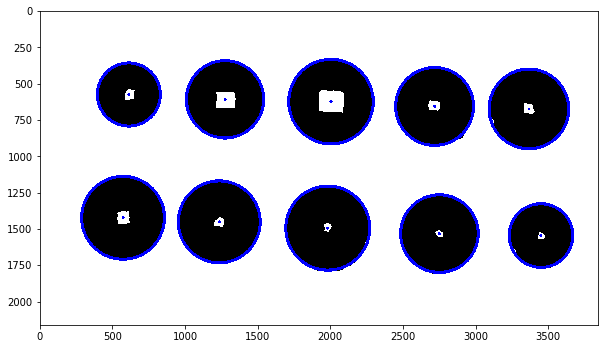

In [58]:
# Detect blobs
# Detect blobs
keypoints = detector.detect(colorInverseMorphImageCopy)
 
# Mark blobs using image annotation concepts we have studied so far
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in blue
    cv2.circle(colorMorphImageCopy,(x,y),5,(0,0,255),10)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in blue
    cv2.circle(colorMorphImageCopy,(x,y),radius,(0,0,255),20)
plt.imshow(colorMorphImageCopy)

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [59]:
# Mark coins using image annotation concepts we have studied so far
imageCopy = image.copy()
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLUE
    cv2.circle(imageCopy,(x,y),5,(255,0,0),10)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in BLUE
    cv2.circle(imageCopy,(x,y),radius,(255,0,0),20)

In [60]:
print(len(keypoints))

10


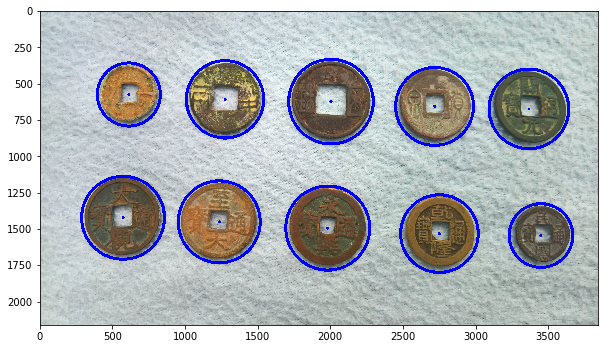

In [61]:
plt.imshow(imageCopy[:,:,::-1])

**Note that we were able to detect 8 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

Now, let's perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [62]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:,:,::-1])

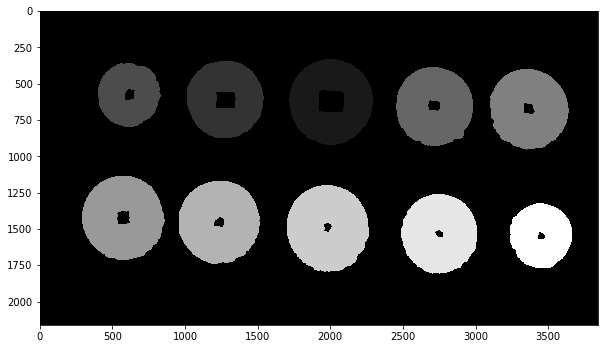

In [63]:
# Find connected components
_, imLabels = cv2.connectedComponents(inverseMorphImage)
plt.imshow(imLabels)

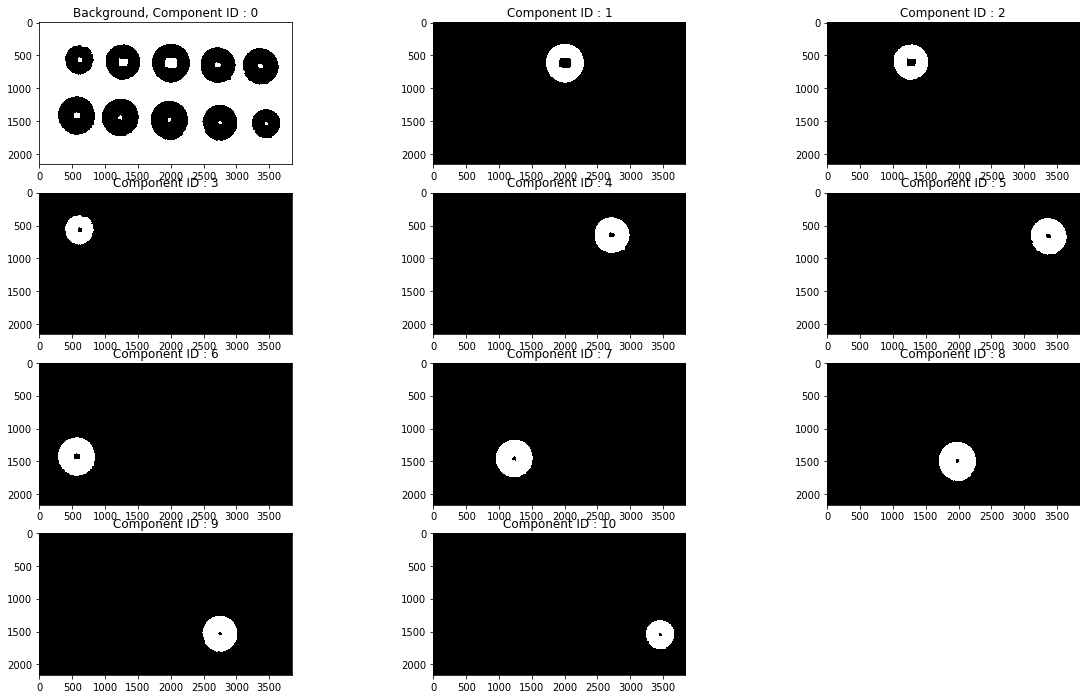

In [64]:
# Display the labels
nComponents = imLabels.max()

displayRows = np.ceil(nComponents/3.0)
plt.figure(figsize=[20,12])
for i in range(nComponents+1):
    plt.subplot(displayRows,3,i+1)
    plt.imshow(imLabels==i)
    if i == 0:
        plt.title("Background, Component ID : {}".format(i))
    else:
        plt.title("Component ID : {}".format(i))

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [65]:
# Find all contours in the image
allContours, hierarchy = cv2.findContours(inverseMorphImage, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [66]:
# Print the number of contours found
print("Number of contours found = {}".format(len(allContours)))

Number of contours found = 20


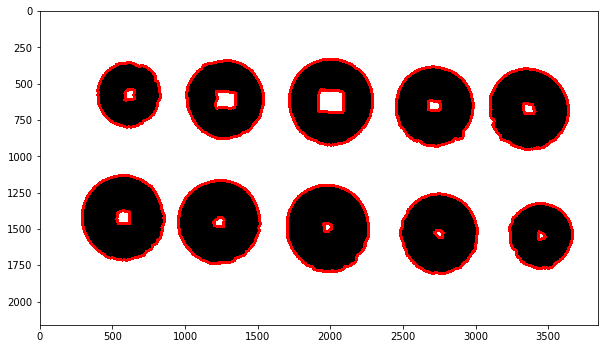

In [67]:
# Draw all contours
colorErodedImage = cv2.cvtColor(morphImageList[2], cv2.COLOR_GRAY2BGR)
contouredImage = cv2.drawContours(colorErodedImage, allContours, -1, (0,0,255), 20)
plt.imshow(contouredImage[:,:,::-1])

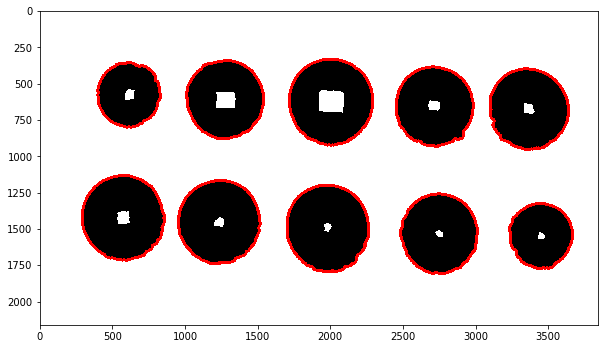

In [68]:
# Remove the inner contours
colorErodedImageCopy = cv2.cvtColor(morphImageList[2], cv2.COLOR_GRAY2BGR)
contours, hierarchy = cv2.findContours(inverseMorphImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Display the result
externalContouredImage = cv2.drawContours(colorErodedImageCopy, contours, -1, (0,0,255), 20)
plt.imshow(externalContouredImage[:,:,::-1])

What do you think went wrong? As we can see, the outer box was detected as a contour and with respect to it, all other contours are internal and that's why they were not detected. How do we remove that? Let's see if we can use area of contours here.

In [69]:
# Print area and perimeter of all contours
for index,cnt in enumerate(allContours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

Contour #1 has area = 1753.0 and perimeter = 179.53910386562347
Contour #2 has area = 2118.0 and perimeter = 194.02438509464264
Contour #3 has area = 2474.0 and perimeter = 212.85281217098236
Contour #4 has area = 3583.5 and perimeter = 247.09545290470123
Contour #5 has area = 6918.0 and perimeter = 348.6518018245697
Contour #6 has area = 149645.0 and perimeter = 1519.165643453598
Contour #7 has area = 224016.0 and perimeter = 1841.7585690021515
Contour #8 has area = 262917.5 and perimeter = 1993.6824505329132
Contour #9 has area = 250673.0 and perimeter = 1945.9839658737183
Contour #10 has area = 255446.0 and perimeter = 1965.4398094415665
Contour #11 has area = 4585.5 and perimeter = 281.4385987520218
Contour #12 has area = 5075.5 and perimeter = 292.61017167568207
Contour #13 has area = 14371.0 and perimeter = 508.9360725879669
Contour #14 has area = 25308.5 and perimeter = 649.1787130832672
Contour #15 has area = 4127.5 and perimeter = 276.61017167568207
Contour #16 has area = 2340

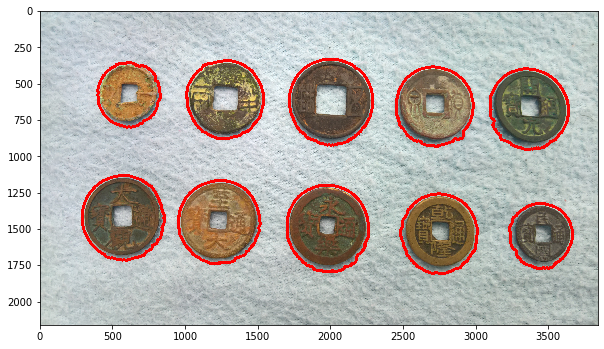

In [70]:
# Fit circles on coins
contouredImage = cv2.drawContours(image, contours, -1, (0,0,255), 20)
plt.imshow(contouredImage[:,:,::-1])